## Importamos librerías e imagen

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

In [2]:
imagen_path = rf'anochece.jpg'
imagen=cv2.imread(imagen_path)

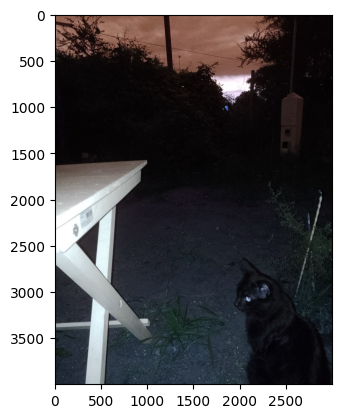

In [3]:
img = cv2.imread(imagen_path)
plt.imshow(img)
plt.show()

Podemos pensar siempre a una imagen como una suerte de matriz que tiene varias dimensiones o, más correctamente, un tensor (que sabemos no es solamente una matriz de muchas dimensiones).

In [4]:
img.shape

(4000, 3000, 3)

## Jugamos un poco con la imagen:

Text(0.5, 1.0, 'Ortopantomografía - R')

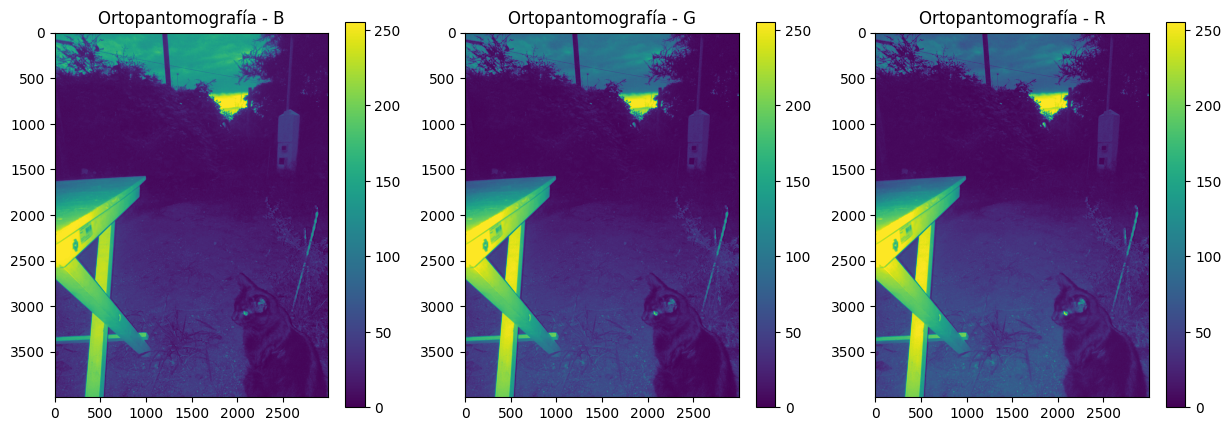

In [5]:

plt.figure(figsize=(15,5))

plt.subplot(131),plt.imshow(img[:,:,0])
plt.colorbar()
plt.title('Ortopantomografía - B')

plt.subplot(132),plt.imshow(img[:,:,1])
plt.colorbar()
plt.title('Ortopantomografía - G')

plt.subplot(133),plt.imshow(img[:,:,2])
plt.colorbar()
plt.title('Ortopantomografía - R')

No parece haber mucha diferencia entre los canales, no?

# Agarramos las tijeras

Le vamos a dibujar una grilla. Como sabemos las medidas de la imagen, dibujamos a valores estáticos, total va a ser una vez nomás.

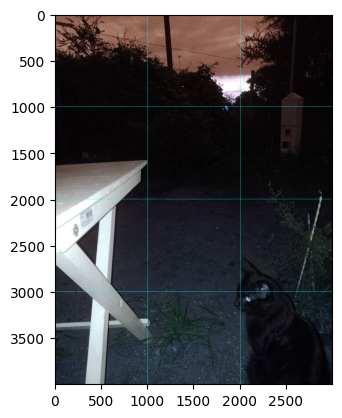

In [6]:
image = img.copy()

yellow = (0, 255, 255)

# definimos las lineas con valores fijos
vertical_lines_x = [1000, 2000, 3000]  
horizontal_lines_y = [1000, 2000, 3000]  

# Dibujamos las lineas
for x in vertical_lines_x:
    cv2.line(image, (x, 0), (x, image.shape[0]), yellow, 2)

for y in horizontal_lines_y:
    cv2.line(image, (0, y), (image.shape[1], y), yellow, 2)

# A ver como quedan:

plt.imshow(image)
plt.show()

Ahora que tenemos marcado por donde, pasamos la tijera:

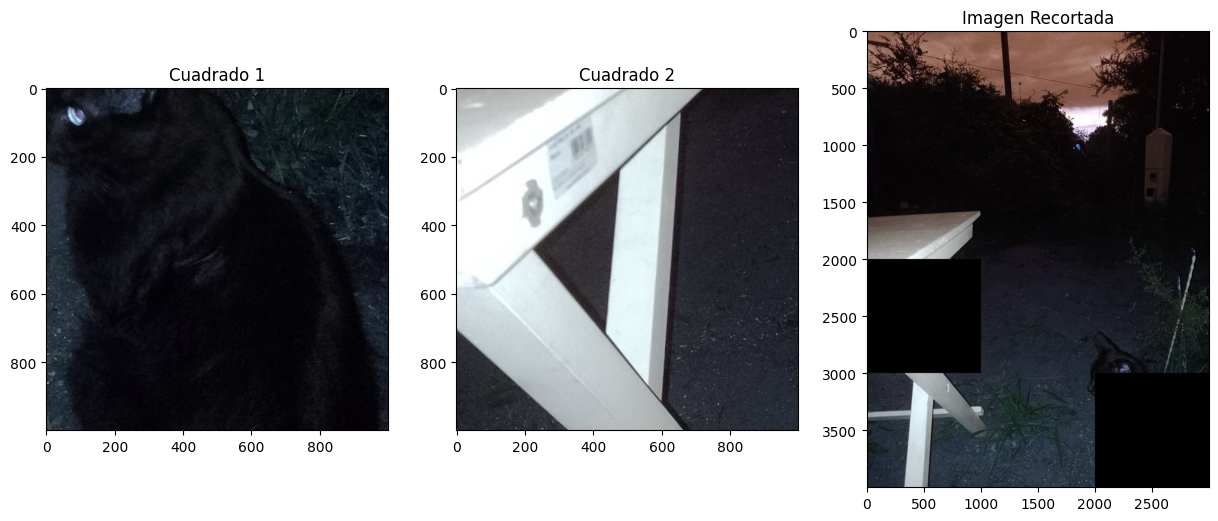

In [7]:
# Sacamos los dos cuadrados y los imprimimos
square_1 = img[3000:4000, 2000:3000, :]
square_2 = img[2000:3000, 0:1000, :]

#Ahora "recortamos" esos cuadrados, dejamos en negro los pixeles que ocupaban.
img_retazo = img.copy()

img_retazo[3000:4000, 2000:3000, :] = 0 
img_retazo[2000:3000, 0:1000, :] = 0


# Graficamos todo

plt.figure(figsize=(15,15))

plt.subplot(131),plt.imshow(square_1)
plt.title('Cuadrado 1')
plt.subplot(132),plt.imshow(square_2)
plt.title('Cuadrado 2')
plt.subplot(133),plt.imshow(img_retazo)
plt.title('Imagen Recortada')

plt.imshow(square_1)
plt.imshow(square_2)
plt.imshow(img_retazo)
plt.show()

Por último, agarramos la plasticola y terminamos nuestra biyección artística:

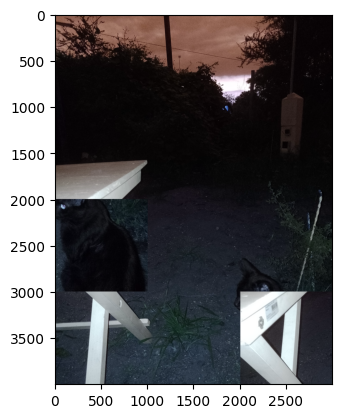

In [45]:
img_cambiada = img.copy()

img_cambiada[3000:4000, 2000:3000, :] = square_2
img_cambiada[2000:3000, 0:1000, :] = square_1

plt.imshow(img_cambiada)
plt.show()

## Buscamos pixeles interesantes:

Sabemos que los pixeles tienen una intensidad en cada canal, busquemos los máximos:

In [8]:
# Ojo que openCV trabaja con BGR, hay que respetar ese orden:
blue_channel = image[:,:,0]
green_channel = image[:,:,1]
red_channel = image[:,:,2]

# Hallamos el valor máximo de cada imagen
b_max_value = np.amax(blue_channel)
g_max_value = np.amax(green_channel)
r_max_value = np.amax(red_channel)

#Habrá alguno que tenga el máximo de los tres?
mask = np.all(img == [b_max_value, g_max_value, r_max_value], axis=-1)

# Encontrmaos las coordenadas de los pixeles donde la condición de arriba se cumple
pixels_where_condition_met = np.argwhere(mask)
print(pixels_where_condition_met)

[[ 788 1820]
 [ 788 1821]
 [ 789 1820]
 ...
 [2514  113]
 [2515  112]
 [2515  113]]


Parece que sí, imprimamos esos solamente:

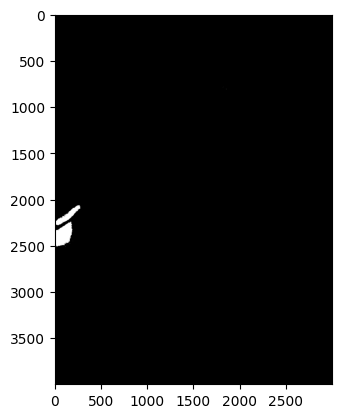

In [9]:
result_image = np.zeros_like(img)
result_image[mask] = img[mask]

plt.imshow(result_image)
plt.show()

Que, como era lógico, son los lugares más brillantes y blancos en donde el flash de la cámara (parece) encontró una mesa de color blanco.

Podríamos, para la próxima, definir alguna forma de medir intensidad para los tres colores a la vez (puede ser la norma L_2 o el mismo valor absoluto) para encontrar el máximo cuando no hay imagenes que alcancen el máximo en las tres coordenadas al mismo tiempo, porque en este caso coincidiría el máximo de esa norma con lo que hallamos hardcodeando.